# Predicting Feedback on Online Food Orders Using Logistic Regression




Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

1. Data Loading and Preprocessing

In [ ]:
df = pd.read_csv('onlinefoods.csv')

# Handle Missing Values
print(df.isna().sum())

# Encode Categorical Variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

one_hot_encoder = OneHotEncoder(sparse=False)
occupation_encoded = one_hot_encoder.fit_transform(df[['Occupation']])
df = df.drop(['Occupation'], axis=1)
df = df.join(pd.DataFrame(occupation_encoded, columns=one_hot_encoder.categories_[0]))

# Feature Selection
input_features = ['Age', 'Gender', 'Marital Status']
target_feature = 'Feedback'

print("\nSelected Input Features:")
print(input_features)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

Selected Input Features:
['Age', 'Gender', 'Marital Status']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. Exploratory Data Analysis (EDA)


Descriptive Statistics of Numeric Columns:
               Age      Gender  Marital Status
count  388.000000  388.000000      388.000000
mean    24.628866    0.572165        1.412371
std      2.975593    0.495404        0.895035
min     18.000000    0.000000        0.000000
25%     23.000000    0.000000        0.000000
50%     24.000000    1.000000        2.000000
75%     26.000000    1.000000        2.000000
max     33.000000    1.000000        2.000000


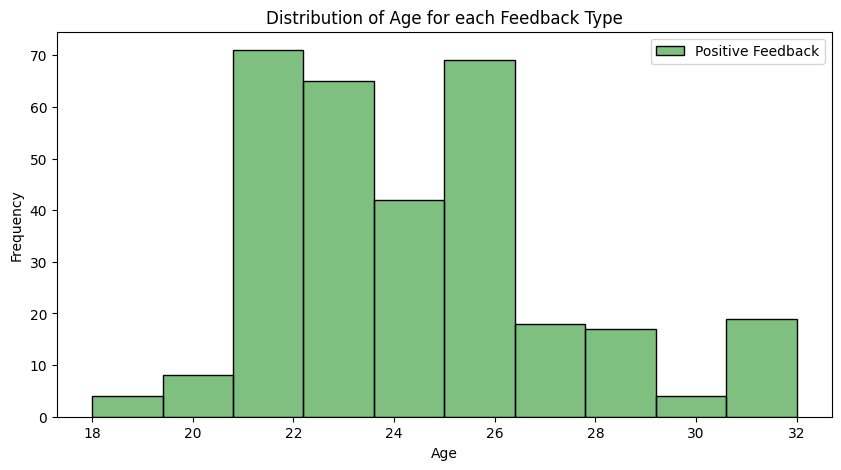

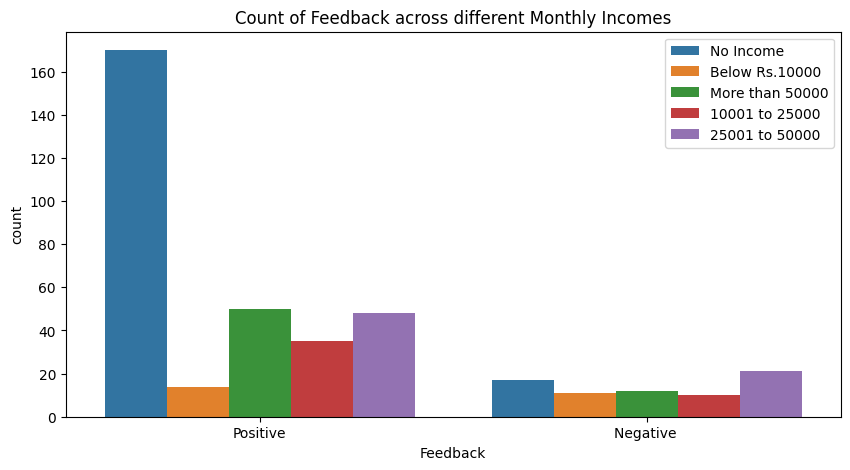

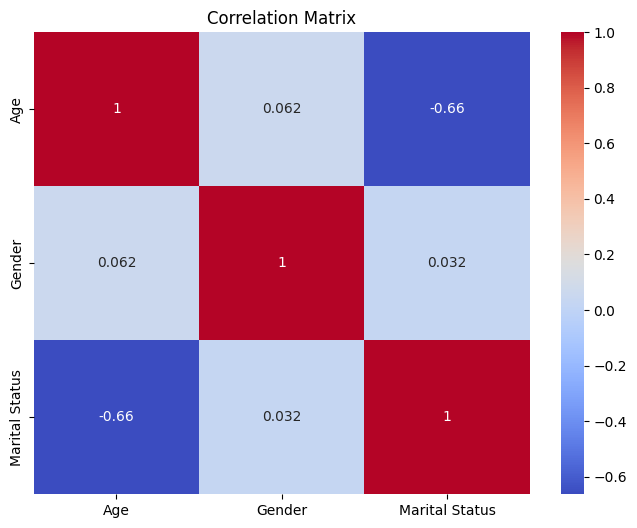

In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics of Numeric Columns:\n", df[input_features].describe())

# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'][df['Feedback'] == 'Positive'], bins=10, color='g', alpha=0.5, label='Positive Feedback')
sns.histplot(df['Age'][df['Feedback'] == 'Negative'], bins=10, color='r', alpha=0.5, label='Negative Feedback')
plt.title('Distribution of Age for each Feedback Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 5))
sns.countplot(x='Feedback', hue='Monthly Income', data=df)
plt.title('Count of Feedback across different Monthly Incomes')
plt.legend()
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[input_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

3. Logistic Regression Model


In [ ]:
X = df[input_features]
y = df[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print Evaluation Metrics
print("\nModel Evaluation Metrics:")
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Training Precision:", precision_score(y_train, y_pred_train, pos_label='Positive'))
print("Training Recall:", recall_score(y_train, y_pred_train, pos_label='Positive'))

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Precision:", precision_score(y_test, y_pred_test, pos_label='Positive'))
print("Test Recall:", recall_score(y_test, y_pred_test, pos_label='Positive'))

# Results Discussion
train_precision = precision_score(y_train, y_pred_train, pos_label='Positive')
train_recall = recall_score(y_train, y_pred_train, pos_label='Positive')
test_precision = precision_score(y_test, y_pred_test, pos_label='Positive')
test_recall = recall_score(y_test, y_pred_test, pos_label='Positive')

print("\nResults Discussion:")
print("- The training accuracy is {:.2f}%.".format(accuracy_score(y_train, y_pred_train)*100))
print("- The training precision is {:.2f}%. This means that when the model predicts a positive feedback, it is correct around {:.2f}% of the time on the training data.".format(train_precision*100, train_precision*100))
print("- The training recall is {:.2f}%. This indicates that the model captures {:.2f}% of all positive instances in the training data.".format(train_recall*100, train_recall*100))
print("- The test accuracy is {:.2f}%.".format(accuracy_score(y_test, y_pred_test)*100))
print("- The test precision is {:.2f}%. This means that when the model predicts a positive feedback on the test data, it is correct around {:.2f}% of the time.".format(test_precision*100, test_precision*100))
print("- The test recall is {:.2f}%. This indicates that the model captures {:.2f}% of all positive instances in the test data.".format(test_recall*100, test_recall*100))


Model Evaluation Metrics:
Training Accuracy:  0.8118081180811808
Training Precision: 0.8111111111111111
Training Recall: 1.0
Test Accuracy: 0.8376068376068376
Test Precision: 0.8376068376068376
Test Recall: 1.0

Results Discussion:
- The training accuracy is 81.18%.
- The training precision is 81.11%. This means that when the model predicts a positive feedback, it is correct around 81.11% of the time on the training data.
- The training recall is 100.00%. This indicates that the model captures 100.00% of all positive instances in the training data.
- The test accuracy is 83.76%.
- The test precision is 83.76%. This means that when the model predicts a positive feedback on the test data, it is correct around 83.76% of the time.
- The test recall is 100.00%. This indicates that the model captures 100.00% of all positive instances in the test data.


4.  Data Analysis and Visualization

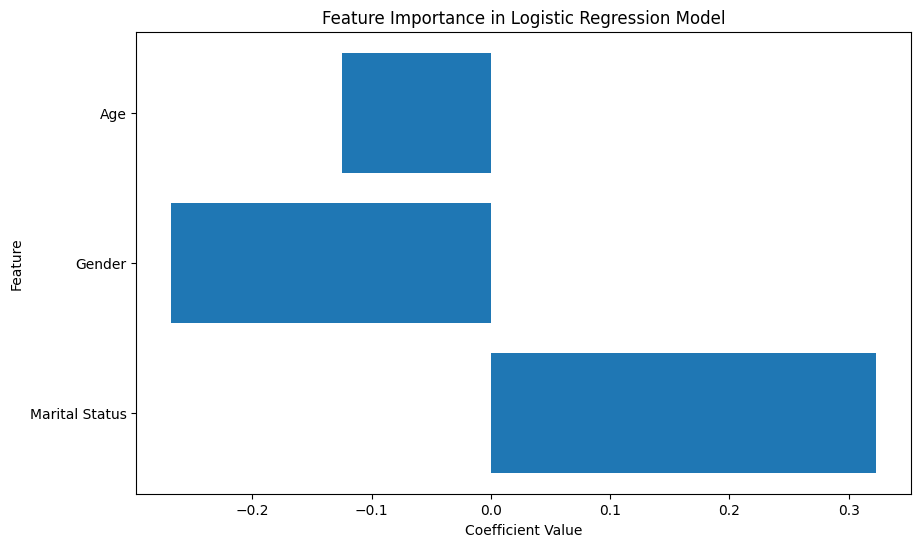



Feature Importance:
- Marital Status has the highest positive coefficient value, indicating that it has the most 
significant positive impact on predicting feedback. Specifically, individuals with a certain marital status (encoded in the dataset) 
are more likely to give positive feedback.
- Gender has a negative coefficient value, indicating that it has a negative impact on predicting 
feedback. This suggests that certain genders (encoded in the dataset) are associated with a lower likelihood of giving positive feedback.
- Age has a negative coefficient value as well, albeit smaller in magnitude compared to Marital Status. 
It indicates that older individuals are slightly less likely to give positive feedback.



In [ ]:
# Get feature coefficients from the trained model
feature_coeffs = model.coef_[0]

# Map feature names to coefficients
feature_coeff_dict = dict(zip(X.columns, feature_coeffs))

# Sort features based on absolute coefficient values
sorted_features = sorted(feature_coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and coefficients
feature_names = [feature[0] for feature in sorted_features]
coefficients = [feature[1] for feature in sorted_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

#Discussion
report = """

Feature Importance:
- Marital Status has the highest positive coefficient value, indicating that it has the most \nsignificant positive impact on predicting feedback. Specifically, individuals with a certain marital status (encoded in the dataset) \nare more likely to give positive feedback.
- Gender has a negative coefficient value, indicating that it has a negative impact on predicting \nfeedback. This suggests that certain genders (encoded in the dataset) are associated with a lower likelihood of giving positive feedback.
- Age has a negative coefficient value as well, albeit smaller in magnitude compared to Marital Status. \nIt indicates that older individuals are slightly less likely to give positive feedback.
"""

print(report)

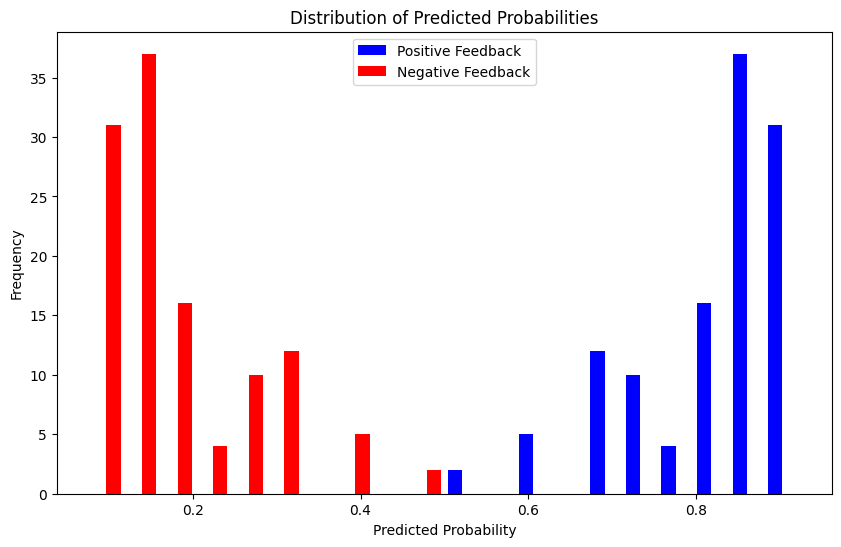


Positive Feedback:
- The mean predicted probability for positive feedback is approximately 0.82, indicating that, 
on average, the model assigns a high probability to instances predicted as positive feedback.
- The median predicted probability is slightly higher, indicating that the distribution is skewed 
towards higher probabilities.
- The maximum predicted probability is around 0.91, suggesting that some instances are confidently 
predicted as positive feedback.
- The minimum predicted probability is approximately 0.58, indicating that even the lowest 
predicted probabilities for positive feedback are relatively high.

Negative Feedback:
- The mean predicted probability for negative feedback is approximately 0.18, indicating that, 
on average, the model assigns a lower probability to instances predicted as negative feedback.
- The median predicted probability is lower than the mean, suggesting that the distribution is 
skewed towards lower probabilities.
- The maximum predicted pro

In [ ]:
# Predict probabilities for both classes
probs = model.predict_proba(X_test)
positive_probs = probs[:, 1]
negative_probs = probs[:, 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([positive_probs, negative_probs], bins=20, color=['blue', 'red'], label=['Positive Feedback', 'Negative Feedback'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

#Discussion
report = """
Positive Feedback:
- The mean predicted probability for positive feedback is approximately 0.82, indicating that, \non average, the model assigns a high probability to instances predicted as positive feedback.
- The median predicted probability is slightly higher, indicating that the distribution is skewed \ntowards higher probabilities.
- The maximum predicted probability is around 0.91, suggesting that some instances are confidently \npredicted as positive feedback.
- The minimum predicted probability is approximately 0.58, indicating that even the lowest \npredicted probabilities for positive feedback are relatively high.

Negative Feedback:
- The mean predicted probability for negative feedback is approximately 0.18, indicating that, \non average, the model assigns a lower probability to instances predicted as negative feedback.
- The median predicted probability is lower than the mean, suggesting that the distribution is \nskewed towards lower probabilities.
- The maximum predicted probability is around 0.42, indicating that some instances are confidently \npredicted as negative feedback.
- The minimum predicted probability is approximately 0.09, suggesting that even the lowest predicted \nprobabilities for negative feedback are not extremely low.
"""

print(report)